In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Random data picker, not really necessary but can be implemented later on.

In [ ]:
# create a random date generator given a year and month
def random_date(year, month):
    import random
    import time
    import datetime
    start = datetime.datetime(year, month, 1, 18, 0, 0)
    end = datetime.datetime(year, month, 30, 18, 0, 0)
    start_epoch = start.timestamp()
    end_epoch = end.timestamp()
    random_second = random.randrange(int(start_epoch), int(end_epoch))
    random_second = datetime.datetime.fromtimestamp(random_second)
    return random_second.strftime('%Y-%m-%d' + ' 18:00:00')

random_date(2017, 10)




Getting data from csv file and filtering by a specific station.

In [46]:
from datetime import datetime
from datetime import datetime
# Load the data
data = pd.read_csv('INBRE_App_Output/output_data_in_2017.csv')
date=(pd.to_datetime(data['system:time_start'],unit='ms')) 
pm25 = data['pm25']
pm_predicted = data['pm_predicted']
station = data['station']
df = pd.DataFrame({'pm25': pm25, 'pm_predicted': pm_predicted, 'station': station, 'date': date})
filtered_df = df[df['station'].isin(['West Yellowstone'])]

# Print the final DataFrame
print(filtered_df)
# Save filtered_df to an Excel file
filtered_df.to_excel('../dataCheck/2017-output/WestYellowstone.xlsx', sheet_name='West Yellowstone', index=False)


          pm25  pm_predicted           station                date
10678   2.9385           NaN  West Yellowstone 2017-01-01 17:00:00
10679   2.9385           NaN  West Yellowstone 2017-01-01 17:00:00
10680   5.2180           NaN  West Yellowstone 2017-01-02 18:00:00
10681   5.2180           NaN  West Yellowstone 2017-01-02 18:00:00
10682   4.7720           NaN  West Yellowstone 2017-01-03 19:00:00
...        ...           ...               ...                 ...
11371  12.4095           NaN  West Yellowstone 2017-12-31 17:06:40
11372   0.8550           NaN  West Yellowstone 2017-11-14 17:20:00
11373   8.4685           NaN  West Yellowstone 2017-11-23 18:00:00
11374   8.4685           NaN  West Yellowstone 2017-11-23 18:00:00
11375   1.9725           NaN  West Yellowstone 2017-11-28 17:26:40

[698 rows x 4 columns]


Running a linear regression model to pull RMSE and R^2 values from a specific station.

In [81]:
model = LinearRegression()

regres_filtered_df = df[df['station'].isin(['West Yellowstone'])]
X, y = regres_filtered_df['pm25'], regres_filtered_df['pm_predicted']

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
y = np.nan_to_num(y, nan=0)

model.fit(X, y)

r_squared = model.score(X, y)

rmse = sqrt(mean_squared_error(X, y))
print(rmse)
print(r_squared)


10.925391788228579
0.33370799946508123


Creating a linear regression graph from the dataframe for a specific station.

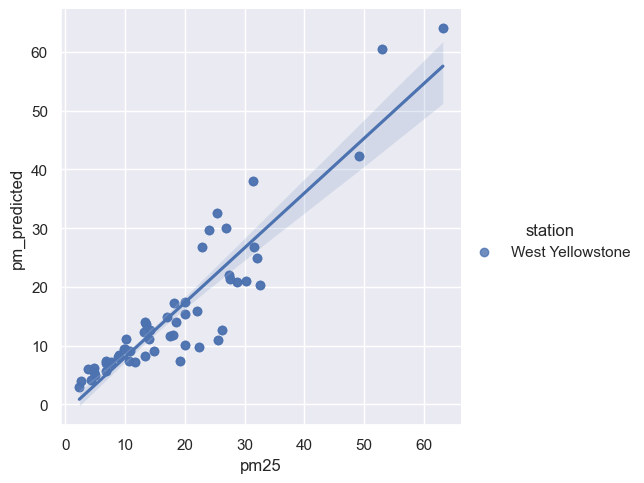

In [82]:
sns.set_theme()
filtered_df = df[df['station'].isin(['West Yellowstone'])]
##date = random_date(2017, 9)
#date_filtered_df = df[df['date'] == date]


g = sns.lmplot(
    data=filtered_df,
    x="pm25", y="pm_predicted", hue="station",
    height=5,
)

g.set_axis_labels("pm25", "pm_predicted")
#g.set(title = "pm25 vs pm_predicted" + ' ' + date)